In [9]:
import matplotlib.pyplot as plt
import numpy as np
from load_data import load_dataset
from matplotlib import cm
from matplotlib import rcParams

load cycle lives and capacity trajectories

In [54]:
raw_data_path = "dataset/48 NMC"
precision = "float"
valid_cells = ["00" + str(i) for i in range(2, 10)] + ["0" + str(i) for i in range(10, 50)]
initial_capacity = np.genfromtxt(raw_data_path + '/initial_capacities.csv', delimiter=',', dtype=precision)
cycle_lives = np.genfromtxt(raw_data_path + '/cycle_lives/cyclelives_80percent.csv', delimiter=',',
                            dtype=precision)

# load target output
capacity_trajectories = load_dataset(raw_data_path, "Capacity trajectories", valid_cells)

In [55]:
cycle_lives.shape

(48,)

plot settings

In [10]:
fontSize = 9
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['mathtext.fontset'] = 'cm'
rcParams['mathtext.rm'] = 'Arial'
plt.rcParams["legend.loc"] = 'lower left'
fontdict = {'fontsize': fontSize,
 'horizontalalignment': 'left'}
rcParams['figure.autolayout'] = True
rcParams['lines.markersize'] = 5
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = fontSize
rcParams['legend.fontsize'] = fontSize
rcParams['legend.frameon'] = False
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True
# rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams["legend.loc"] = 'lower left'

rcParams['pdf.fonttype'] = 42

rcParams['ps.fonttype'] = 42
sz = 15

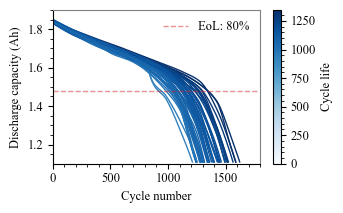

In [56]:
maxCycleAll = cycle_lives.max()
cmap = cm.get_cmap('Blues')
colors_cells = cm.get_cmap('Blues')(cycle_lives/maxCycleAll)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(3.5,2.2))
for i in range(cycle_lives.shape[0]):
  axs.plot(capacity_trajectories[i][:,0], capacity_trajectories[i][:,1] * initial_capacity[i], color = colors_cells[i])

sc2 = axs.scatter(0, 0, s=sz, c=0, cmap=cmap, vmin=0, vmax=maxCycleAll)
axs.plot(np.arange(0, 1800, 10), 1.85 * 0.8 * np.ones_like(np.arange(0, 1800, 10)),
         linestyle="--", linewidth=1, color='tab:red', alpha=0.5, label="EoL: 80%")
axs.legend(loc = 'upper right', fontsize=fontSize)
axs.set_xlabel('Cycle number', fontsize=fontSize)
axs.set_ylabel('Discharge capacity (Ah)', fontsize=fontSize)

# Set axis limits
axs.set_xlim([0, 1800])
axs.set_ylim([1.1, 1.9])

# Set ticks
# axs[0].set_xticks(np.linspace(0,2000,5))
# axs[0].set_yticks(np.linspace(00.9,1.1,5))

# Set ticks parameters
axs.tick_params(axis='both', labelsize=fontSize)

# Set frame color
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_color('k')
axs.spines['top'].set_color('gray')
axs.spines['right'].set_color('gray')

# Create colorbar
# cbar = axs[3][2].figure.colorbar(sc1, ticks=np.linspace(0,2000,5))
# cbar = fig.colorbar(sc1, ax=axs[3][2], location='right')
cbar = fig.colorbar(sc2, ax=axs)
cbar.ax.set_xticks(np.linspace(0,1500,4), minor=False)
cbar.ax.tick_params(labelsize=fontSize)
cbar.set_label('Cycle life', fontsize=fontSize)  # cax == cb.ax
sc2.set_clim(0, maxCycleAll+1)
fig.tight_layout(rect=[0, 0.01, 1, 0.99])
plt.show()

In [57]:
fig.savefig("cap_trajectories_48NMC.png", transparent=True, format='png', dpi=1000)

169 LFP cells

In [42]:
# load cycle lives for the train and three test datasets
raw_data_path = "dataset/169 LFP"
cycle_lives_train = np.genfromtxt(raw_data_path + '/cycle_lives/train_cycle_lives.csv',
                                  delimiter=',', dtype=precision)
cycle_lives_test1 = np.genfromtxt(raw_data_path + '/cycle_lives/test1_cycle_lives.csv',
                                  delimiter=',', dtype=precision)
cycle_lives_test2 = np.genfromtxt(raw_data_path + '/cycle_lives/test2_cycle_lives.csv',
                                  delimiter=',', dtype=precision)
cycle_lives_test3 = np.genfromtxt(raw_data_path + '/cycle_lives/test3_cycle_lives.csv',
                                  delimiter=',', dtype=precision)

# load # load target output for the train and three test datasets
valid_cells_train = ["cell" + str(i) for i in range(1, 42)]
valid_cells_test1 = ["cell" + str(i) for i in range(1, 43)]
valid_cells_test2 = ["cell" + str(i) for i in range(1, 41)]
valid_cells_test3 = ["cell" + str(i) for i in range(1, 46)]
capacity_trajectories_train = load_dataset(raw_data_path, "discharge_capacity/train",
                                          valid_cells_train)
capacity_trajectories_test1 = load_dataset(raw_data_path, "discharge_capacity/test1",
                                          valid_cells_test1)
capacity_trajectories_test2 = load_dataset(raw_data_path, "discharge_capacity/test2", valid_cells_test2)
capacity_trajectories_test3 = load_dataset(raw_data_path, "discharge_capacity/test3", valid_cells_test3)

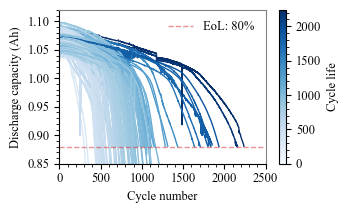

In [52]:
maxCycleAll = max([cycle_lives_train.max(), cycle_lives_test1.max(), cycle_lives_test2.max(), cycle_lives_test3.max()])
cmap = cm.get_cmap('Blues')
colors_train = cm.get_cmap('Blues')(cycle_lives_train/maxCycleAll)
colors_test1 = cm.get_cmap('Blues')(cycle_lives_test1/maxCycleAll)
colors_test2 = cm.get_cmap('Blues')(cycle_lives_test2/maxCycleAll)
colors_test3 = cm.get_cmap('Blues')(cycle_lives_test3/maxCycleAll)
cycle_lives_all = [cycle_lives_train, cycle_lives_test1, cycle_lives_test2, cycle_lives_test3]
capacity_trajectories_all = [capacity_trajectories_train, capacity_trajectories_test1, capacity_trajectories_test2, capacity_trajectories_test3]
colors_all = [colors_train, colors_test1, colors_test2, colors_test3]
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(3.5,2.2))
for cycle_lives, capacity_trajectories, colors_cells in zip(cycle_lives_all, capacity_trajectories_all, colors_all):
    for cycle_life, capacity_trajectory, color_cell in zip(cycle_lives, capacity_trajectories, colors_cells):
      axs.plot(capacity_trajectory[:,0], capacity_trajectory[:,1], color = color_cell)

sc2 = axs.scatter(0, 0, s=sz, c=0, cmap=cmap, vmin=0, vmax=maxCycleAll)
axs.plot(np.arange(0, 2500, 10), 1.1 * 0.8 * np.ones_like(np.arange(0, 2500, 10)),
         linestyle="--", linewidth=1, color='tab:red', alpha=0.5, label="EoL: 80%")
axs.legend(loc = 'upper right', fontsize=fontSize)
axs.set_xlabel('Cycle number', fontsize=fontSize)
axs.set_ylabel('Discharge capacity (Ah)', fontsize=fontSize)

# Set axis limits
axs.set_xlim([0, 2500])
axs.set_ylim([0.85, 1.12])

# Set ticks
# axs[0].set_xticks(np.linspace(0,2000,5))
# axs[0].set_yticks(np.linspace(00.9,1.1,5))

# Set ticks parameters
axs.tick_params(axis='both', labelsize=fontSize)

# Set frame color
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_color('k')
axs.spines['top'].set_color('gray')
axs.spines['right'].set_color('gray')

# Create colorbar
# cbar = axs[3][2].figure.colorbar(sc1, ticks=np.linspace(0,2000,5))
# cbar = fig.colorbar(sc1, ax=axs[3][2], location='right')
cbar = fig.colorbar(sc2, ax=axs)
cbar.ax.set_xticks(np.linspace(0,1500,4), minor=False)
cbar.ax.tick_params(labelsize=fontSize)
cbar.set_label('Cycle life', fontsize=fontSize)  # cax == cb.ax
sc2.set_clim(0, maxCycleAll+1)
fig.tight_layout(rect=[0, 0.01, 1, 0.99])
plt.show()

In [53]:
fig.savefig("cap_trajectories_169LFP.png", transparent=True, format='png', dpi=1000)